In [1]:
import dill
import math
import numpy as np
from pprint import pprint
from bayes_opt import BayesianOptimization
from datetime import datetime as dt

CURRENT_YEAR = 2024
MAX_YEAR = 2124
years = list(range(CURRENT_YEAR, MAX_YEAR))
delays = {}

exec(open('utils.py').read())
print('Loaded')

Loaded


## Algorithms/insights delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 4         | -0.1244   | 4.558     | 8.915     | 0.8782    |
| 8         | -0.09126  | 0.5883    | 9.618     | 8.218     |
| 28        | -0.02986  | 0.8847    | 3.152     | 0.3124    |
| 48        | -0.02779  | 0.6425    | 3.113     | 0.4076    |
| 49        | -0.01056  | 0.6436    | 3.309     | 0.3176    |
Curve params found
{'push': 0.6435877541344178,
 'shift': 3.308669735265759,
 'slope': 0.3175783877706173}
-
## Chance of nonscaling delay ##


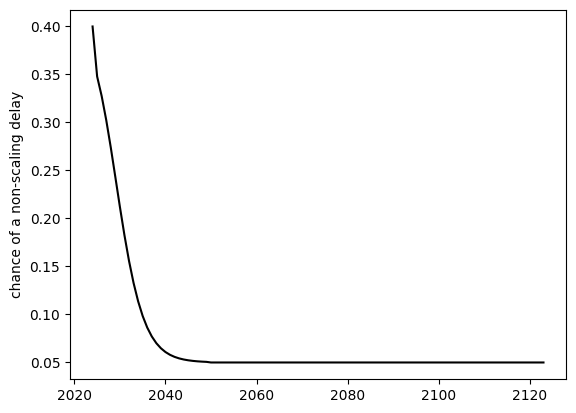

Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 40%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 35%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 33%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 27%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 24%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 21%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 18%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 16%
Year: 2033 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 13%
Year: 2034

In [2]:
nonscaling_points = [(2024, 0.4),
                     (2027, 0.3),
                     (2030, 0.2),
                     (2035, 0.1),
                     (2050, 0.05)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['algorithms'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.9, sq.lognorm(2, 5)], [0.1, sq.lognorm(2, 20)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['algorithms']['length'] @ 1000, digits=0))

## Infrastructure delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 2         | -0.1757   | 1.982     | 6.204     | 4.256     |
| 3         | -0.1537   | 1.51      | 9.656     | 6.189     |
| 6         | -0.05909  | 0.7623    | 8.781     | 1.226     |
| 52        | -0.04129  | 0.6692    | 8.26      | 0.6593    |
| 114       | -0.04024  | 0.01      | 9.324     | 3.438     |
Curve params found
{'push': 0.01, 'shift': 9.323585831280909, 'slope': 3.43780906736572}
-
## Chance of nonscaling delay ##


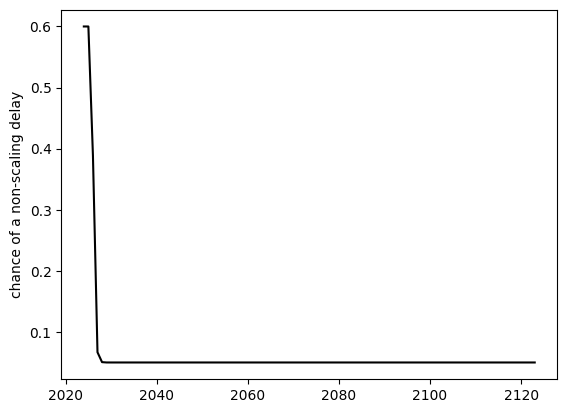

Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 60%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 60%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 39%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 7%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2033 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2034 - chan

In [3]:
# https://twitter.com/ohlennart/status/1645058017119854592
# https://asteriskmag.com/issues/03/the-transistor-cliff
nonscaling_points = [(2024, 0.6),
                     (2026, 0.4),
                     (2030, 0.2),
                     (2050, 0.05)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['infra'] = {'prob': p_nonscaling_delay, 'length': sq.lognorm(1, 10)}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['infra']['length'] @ 1000, digits=0))

## Data delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 2         | -0.2532   | 4.575     | 4.536     | 5.061     |
| 5         | -0.2371   | 2.779     | 2.931     | 1.173     |
| 6         | -0.2189   | 3.009     | 9.377     | 4.541     |
| 10        | -0.1567   | 0.9204    | 5.167     | 1.339     |
| 17        | -0.0702   | 0.656     | 5.054     | 0.346     |
| 42        | -0.06409  | 0.8505    | 4.87      | 0.561     |
| 45        | -0.05938  | 0.5586    | 5.073     | 0.7395    |
| 46        | -0.02255  | 0.2979    | 4.616     | 0.7725    |
| 51        | -0.01835  | 0.2013    | 4.737     | 0.7332    |
Curve params found
{'push': 0.20130112043837242,
 'shift': 4.7372544924578435,
 'slope': 0.7331871769943217}
-
## Chance of nonscaling delay ##


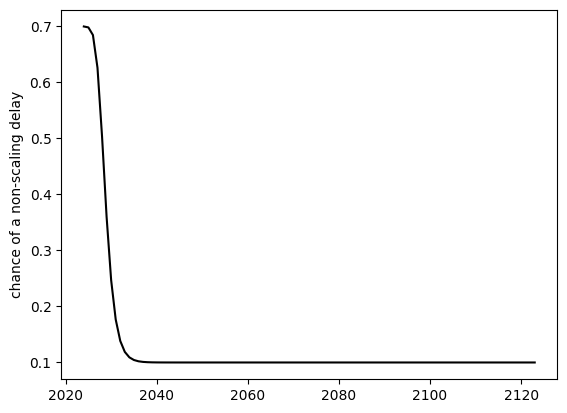

Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 70%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 70%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 68%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 63%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 50%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 36%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 25%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 18%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 14%
Year: 2033 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 12%
Year: 2034

In [4]:
nonscaling_points = [(2024, 0.7),
                     (2027, 0.6),
                     (2030, 0.2),
                     (2050, 0.1)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['data'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.9, sq.lognorm(1, 8)], [0.1, sq.lognorm(3, 10)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['data']['length'] @ 1000, digits=0))

## Robotics need delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 2         | -0.0849   | 1.859     | 1.954     | 9.825     |
| 6         | -0.08233  | 5.284     | 7.029     | 0.2841    |
| 7         | -0.07423  | 2.174     | 6.849     | 8.744     |
| 21        | -0.05507  | 0.8595    | 7.656     | 3.398     |
| 44        | -0.05026  | 0.3595    | 6.204     | 3.175     |
| 45        | -0.05     | 0.01      | 6.703     | 4.692     |
| 55        | -0.05     | 0.01      | 4.168     | 4.192     |
| 56        | -0.05     | 0.01      | 10.0      | 3.737     |
| 58        | -0.04991  | 0.01      | 4.081     | 2.095     |
| 67        | -0.04967  | 0.01      | 10.0      | 2.027     |
Curve params found
{'push': 0.01, 'shift': 10.0, 'slope': 2.027158502783066}
-
## Chance of nonscaling delay ##


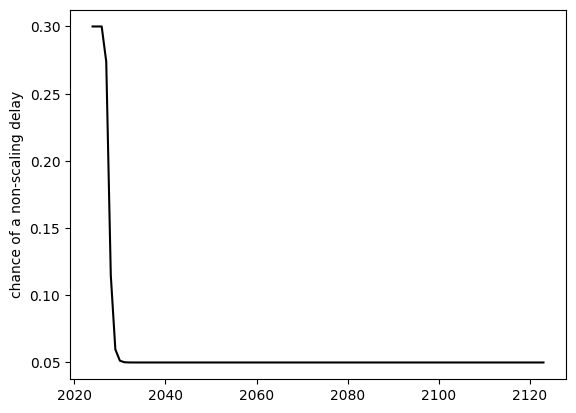

Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 27%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 11%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 6%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2033 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2034 - ch

In [5]:
nonscaling_points = [(2024, 0.3),
                     (2030, 0.2),
                     (2040, 0.1),
                     (2050, 0.05)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['robotics'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.85, sq.lognorm(3, 10)],
                                                                        [0.15, sq.lognorm(7, 15)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['robotics']['length'] @ 1000, digits=0))

## Integration delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 2         | -0.09079  | 5.009     | 7.477     | 8.58      |
| 5         | -0.05026  | 0.4299    | 9.623     | 9.032     |
| 8         | -0.05     | 0.02104   | 1.267     | 6.659     |
| 42        | -0.05     | 0.01      | 7.785     | 2.72      |
| 46        | -0.0364   | 0.01      | 9.366     | 0.474     |
| 49        | -0.03045  | 0.01      | 10.0      | 1.019     |
Curve params found
{'push': 0.01, 'shift': 10.0, 'slope': 1.0193976163292935}
-
## Chance of nonscaling delay ##


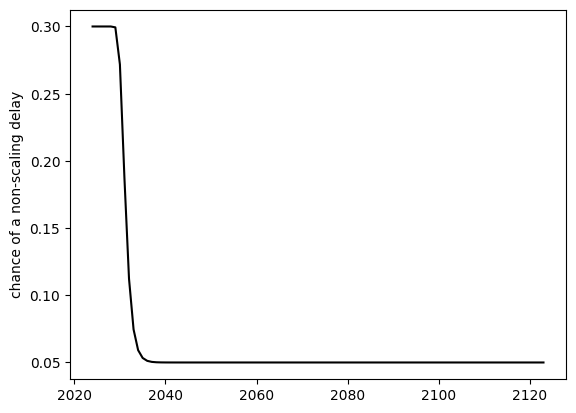

Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 27%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 19%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 11%
Year: 2033 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 7%
Year: 2034 

In [6]:
# https://twitter.com/MatthewJBar/status/1653461856919654400
nonscaling_points = [(2024, 0.3),
                     (2030, 0.2),
                     (2040, 0.1),
                     (2050, 0.05)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['integration'] = {'prob': p_nonscaling_delay, 'length': sq.lognorm(3, 30)}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['integration']['length'] @ 1000, digits=0))

##  Real world feedback delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 10        | -0.01102  | 0.9863    | 5.171     | 0.6089    |
| 14        | -0.01018  | 0.444     | 8.229     | 4.451     |
| 22        | -0.01     | 0.186     | 5.147     | 3.92      |
| 42        | -0.01     | 0.01      | 6.371     | 8.823     |
| 43        | -0.01     | 0.01      | 7.193     | 6.382     |
| 48        | -0.01     | 0.01      | 10.0      | 6.312     |
| 49        | -0.007627 | 0.01      | 5.559     | 1.449     |
Curve params found
{'push': 0.01, 'shift': 5.559302938374086, 'slope': 1.4488690412527734}
-
## Chance of nonscaling delay ##


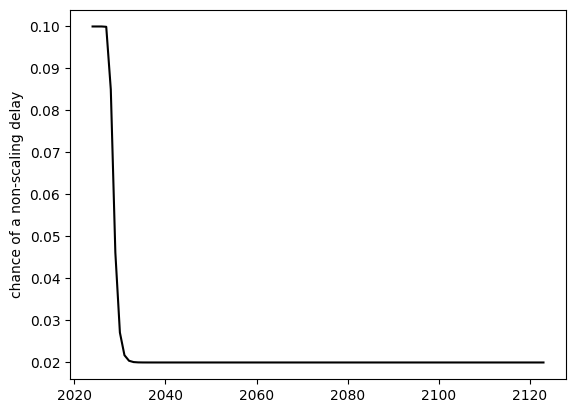

Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 9%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 3%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 2%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 2%
Year: 2033 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 2%
Year: 2034 - cha

In [7]:
nonscaling_points = [(2024, 0.1),
                     (2030, 0.05),
                     (2050, 0.02)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['real_world_feedback'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.8, sq.lognorm(3, 10)],
                                                                                   [0.1, sq.lognorm(10, 30)],
                                                                                   [0.1, sq.lognorm(20, 50)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['real_world_feedback']['length'] @ 1000, digits=0))

## Take off speeds

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 2         | -0.2172   | 9.607     | 4.47      | 2.723     |
| 4         | -0.1636   | 1.185     | 1.887     | 7.381     |
| 10        | -0.1628   | 2.7       | 9.657     | 0.9199    |
| 12        | -0.1128   | 0.356     | 7.685     | 9.244     |
| 29        | -0.1126   | 0.2336    | 5.029     | 2.847     |
| 32        | -0.1124   | 0.2712    | 8.747     | 1.749     |
| 115       | -0.1064   | 0.01      | 7.63      | 1.606     |
Curve params found
{'push': 0.01, 'shift': 7.630105349762228, 'slope': 1.605790413069048}
-
## Chance of nonscaling delay ##


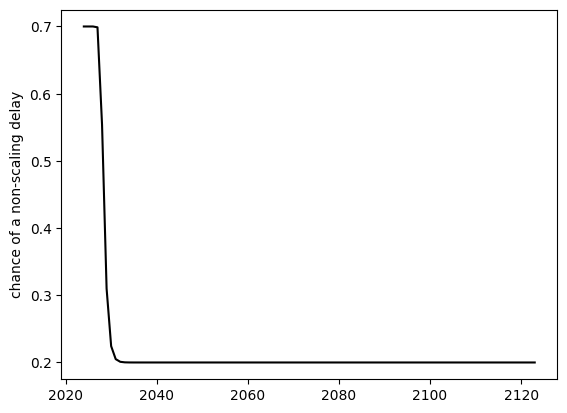

Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 70%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 70%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 70%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 70%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 55%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 31%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 22%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 20%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 20%
Year: 2033 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 20%
Year: 2034

In [8]:
# https://www.lesswrong.com/posts/Gc9FGtdXhK9sCSEYu/what-a-compute-centric-framework-says-about-ai-takeoff
nonscaling_points = [(2024, 0.7),
                     (2030, 0.5),
                     (2050, 0.35),
                     (2080, 0.2)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['take_off'] = {'prob': p_nonscaling_delay, 'length': sq.lognorm(2, 15)}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['take_off']['length'] @ 1000, digits=0))

## Save

In [9]:
with open('caches/nonscaling_delays.dill', 'wb') as f:
    dill.dump(delays, f)
    
print('cached!')

cached!


In [10]:
print('File last ran: {}'.format(dt.now()))

File last ran: 2023-12-16 16:43:47.098108
